In [1]:
import import_ipynb
from utils import df_from_csv, df_pm25_to_df_aqi, plot_hist, plot_boxes, plot_lines, df_to_csv

importing Jupyter notebook from utils.ipynb
importing Jupyter notebook from aqi_epa_pm25.ipynb
PM2.5: 35.9, AQI: 102
PM2.5: 35.9, Measure Level: MeasureLevels.UNHEALTHY_FOR_SENSITIVE_GROUPS, Range Values: Min: 35.5, Max: 55.4
AQI: 102, Measure Level: MeasureLevels.UNHEALTHY_FOR_SENSITIVE_GROUPS, Range Values: Min: 101, Max: 150


## PM2.5 to AQI

In [2]:
# Load Raw Data
df_pm25_clean = df_from_csv("pm25_clean.csv", datafolder="1_clean")

# Check Data Types
print(df_pm25_clean.dtypes)

df_pm25_clean.head()

TANGARA_25CE    float64
TANGARA_260A    float64
TANGARA_4B1A    float64
TANGARA_14D6    float64
TANGARA_1EE6    float64
TANGARA_2E9A    float64
TANGARA_2FF6    float64
TANGARA_1712    float64
TANGARA_48C6    float64
TANGARA_532E    float64
TANGARA_F1AE    float64
TANGARA_06BE    float64
dtype: object


,TANGARA_25CE,TANGARA_260A,TANGARA_4B1A,TANGARA_14D6,TANGARA_1EE6,TANGARA_2E9A,TANGARA_2FF6,TANGARA_1712,TANGARA_48C6,TANGARA_532E,TANGARA_F1AE,TANGARA_06BE
DATETIME,,,,,,,,,,,,
2023-09-26 00:00:30-05:00,1.0,6.0,5.0,7.0,2.0,11.0,7.0,14.0,3.0,7.0,5.0,0.0
2023-09-26 00:01:00-05:00,1.0,6.0,7.0,6.0,3.0,12.0,8.0,13.0,7.0,9.0,5.0,0.0
2023-09-26 00:01:30-05:00,1.0,7.0,8.0,6.0,NaN,11.0,8.0,12.0,7.0,NaN,5.0,0.0
2023-09-26 00:02:00-05:00,0.0,7.0,8.0,6.0,NaN,11.0,8.0,14.0,7.0,11.0,5.0,0.0
2023-09-26 00:02:30-05:00,1.0,6.0,8.0,6.0,3.0,9.0,9.0,13.0,5.0,10.0,5.0,0.0


## Descriptive Statistics

In [3]:
# Describe Data
df_pm25_clean.describe()

,TANGARA_25CE,TANGARA_260A,TANGARA_4B1A,TANGARA_14D6,TANGARA_1EE6,TANGARA_2E9A,TANGARA_2FF6,TANGARA_1712,TANGARA_48C6,TANGARA_532E,TANGARA_F1AE,TANGARA_06BE
count,9.000000,9.000000,9.000000,9.000000,7.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.0
mean,0.888889,6.333333,7.333333,5.777778,2.714286,10.666667,8.777778,13.222222,5.777778,9.375000,4.888889,0.0
std,0.333333,0.500000,1.000000,0.666667,0.487950,1.000000,1.092906,0.666667,1.394433,1.187735,0.333333,0.0
min,0.000000,6.000000,5.000000,5.000000,2.000000,9.000000,7.000000,12.000000,3.000000,7.000000,4.000000,0.0
25%,1.000000,6.000000,7.000000,5.000000,2.500000,10.000000,8.000000,13.000000,5.000000,9.000000,5.000000,0.0
50%,1.000000,6.000000,8.000000,6.000000,3.000000,11.000000,9.000000,13.000000,6.000000,9.500000,5.000000,0.0
75%,1.000000,7.000000,8.000000,6.000000,3.000000,11.000000,10.000000,14.000000,7.000000,10.000000,5.000000,0.0
max,1.000000,7.000000,8.000000,7.000000,3.000000,12.000000,10.000000,14.000000,7.000000,11.000000,5.000000,0.0


## PM2.5 to AQI

In [4]:
# AQI DataFrame Sensors
df_aqi = df_pm25_to_df_aqi(df_pm25_clean)
df_aqi = df_aqi.astype('float')
df_aqi.head()

,TANGARA_25CE,TANGARA_260A,TANGARA_4B1A,TANGARA_14D6,TANGARA_1EE6,TANGARA_2E9A,TANGARA_2FF6,TANGARA_1712,TANGARA_48C6,TANGARA_532E,TANGARA_F1AE,TANGARA_06BE
DATETIME,,,,,,,,,,,,
2023-09-26 00:00:30-05:00,5.0,25.0,21.0,30.0,9.0,46.0,30.0,55.0,13.0,30.0,21.0,0.0
2023-09-26 00:01:00-05:00,5.0,25.0,30.0,25.0,13.0,50.0,34.0,53.0,30.0,38.0,21.0,0.0
2023-09-26 00:01:30-05:00,5.0,30.0,34.0,25.0,NaN,46.0,34.0,50.0,30.0,NaN,21.0,0.0
2023-09-26 00:02:00-05:00,0.0,30.0,34.0,25.0,NaN,46.0,34.0,55.0,30.0,46.0,21.0,0.0
2023-09-26 00:02:30-05:00,5.0,25.0,34.0,25.0,13.0,38.0,38.0,53.0,21.0,42.0,21.0,0.0


## Describe Statistics

In [5]:
# Describe Data
df_aqi.describe()

,TANGARA_25CE,TANGARA_260A,TANGARA_4B1A,TANGARA_14D6,TANGARA_1EE6,TANGARA_2E9A,TANGARA_2FF6,TANGARA_1712,TANGARA_48C6,TANGARA_532E,TANGARA_F1AE,TANGARA_06BE
count,9.000000,9.000000,9.000000,9.000000,7.000000,9.000000,9.000000,9.000000,9.000000,8.00000,9.000000,9.0
mean,4.444444,26.666667,31.222222,24.222222,11.857143,44.666667,37.111111,53.333333,24.555556,39.50000,20.555556,0.0
std,1.666667,2.500000,4.294700,2.905933,1.951800,4.000000,4.371626,1.581139,6.023104,4.75094,1.333333,0.0
min,0.000000,25.000000,21.000000,21.000000,9.000000,38.000000,30.000000,50.000000,13.000000,30.00000,17.000000,0.0
25%,5.000000,25.000000,30.000000,21.000000,11.000000,42.000000,34.000000,53.000000,21.000000,38.00000,21.000000,0.0
50%,5.000000,25.000000,34.000000,25.000000,13.000000,46.000000,38.000000,53.000000,25.000000,40.00000,21.000000,0.0
75%,5.000000,30.000000,34.000000,25.000000,13.000000,46.000000,42.000000,55.000000,30.000000,42.00000,21.000000,0.0
max,5.000000,30.000000,34.000000,30.000000,13.000000,50.000000,42.000000,55.000000,30.000000,46.00000,21.000000,0.0


## Histograms

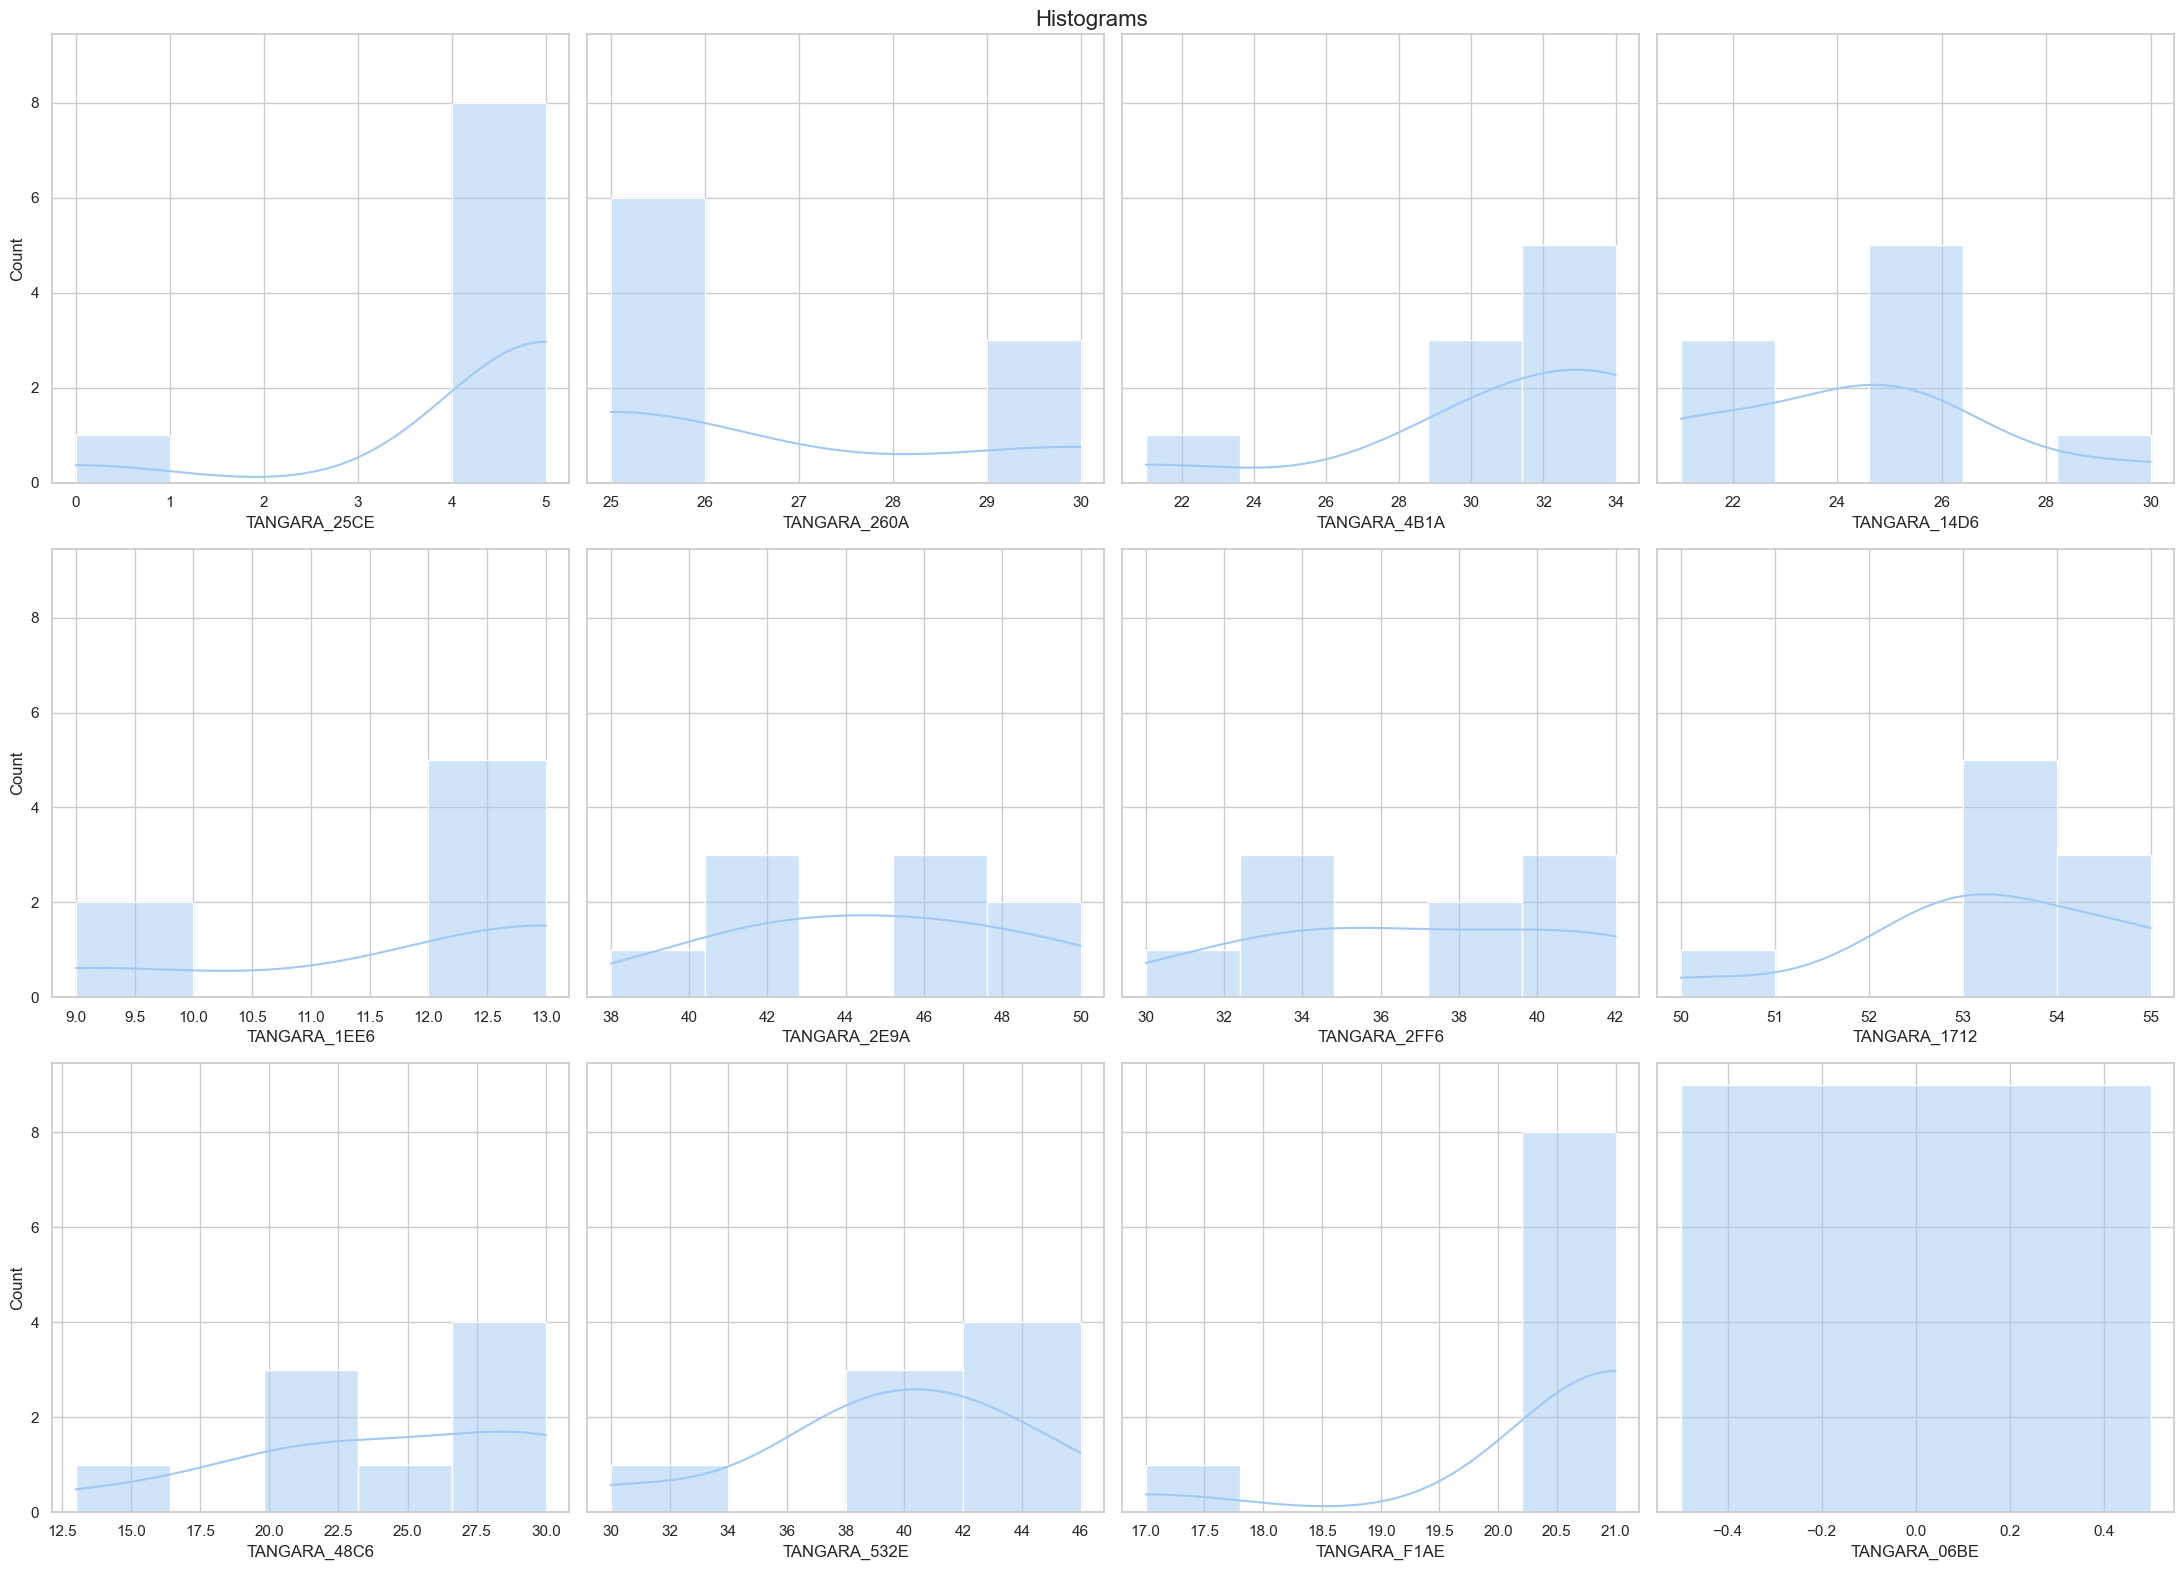

In [6]:
# Plot Histograms
plot_hist(df_aqi)

## Boxplots

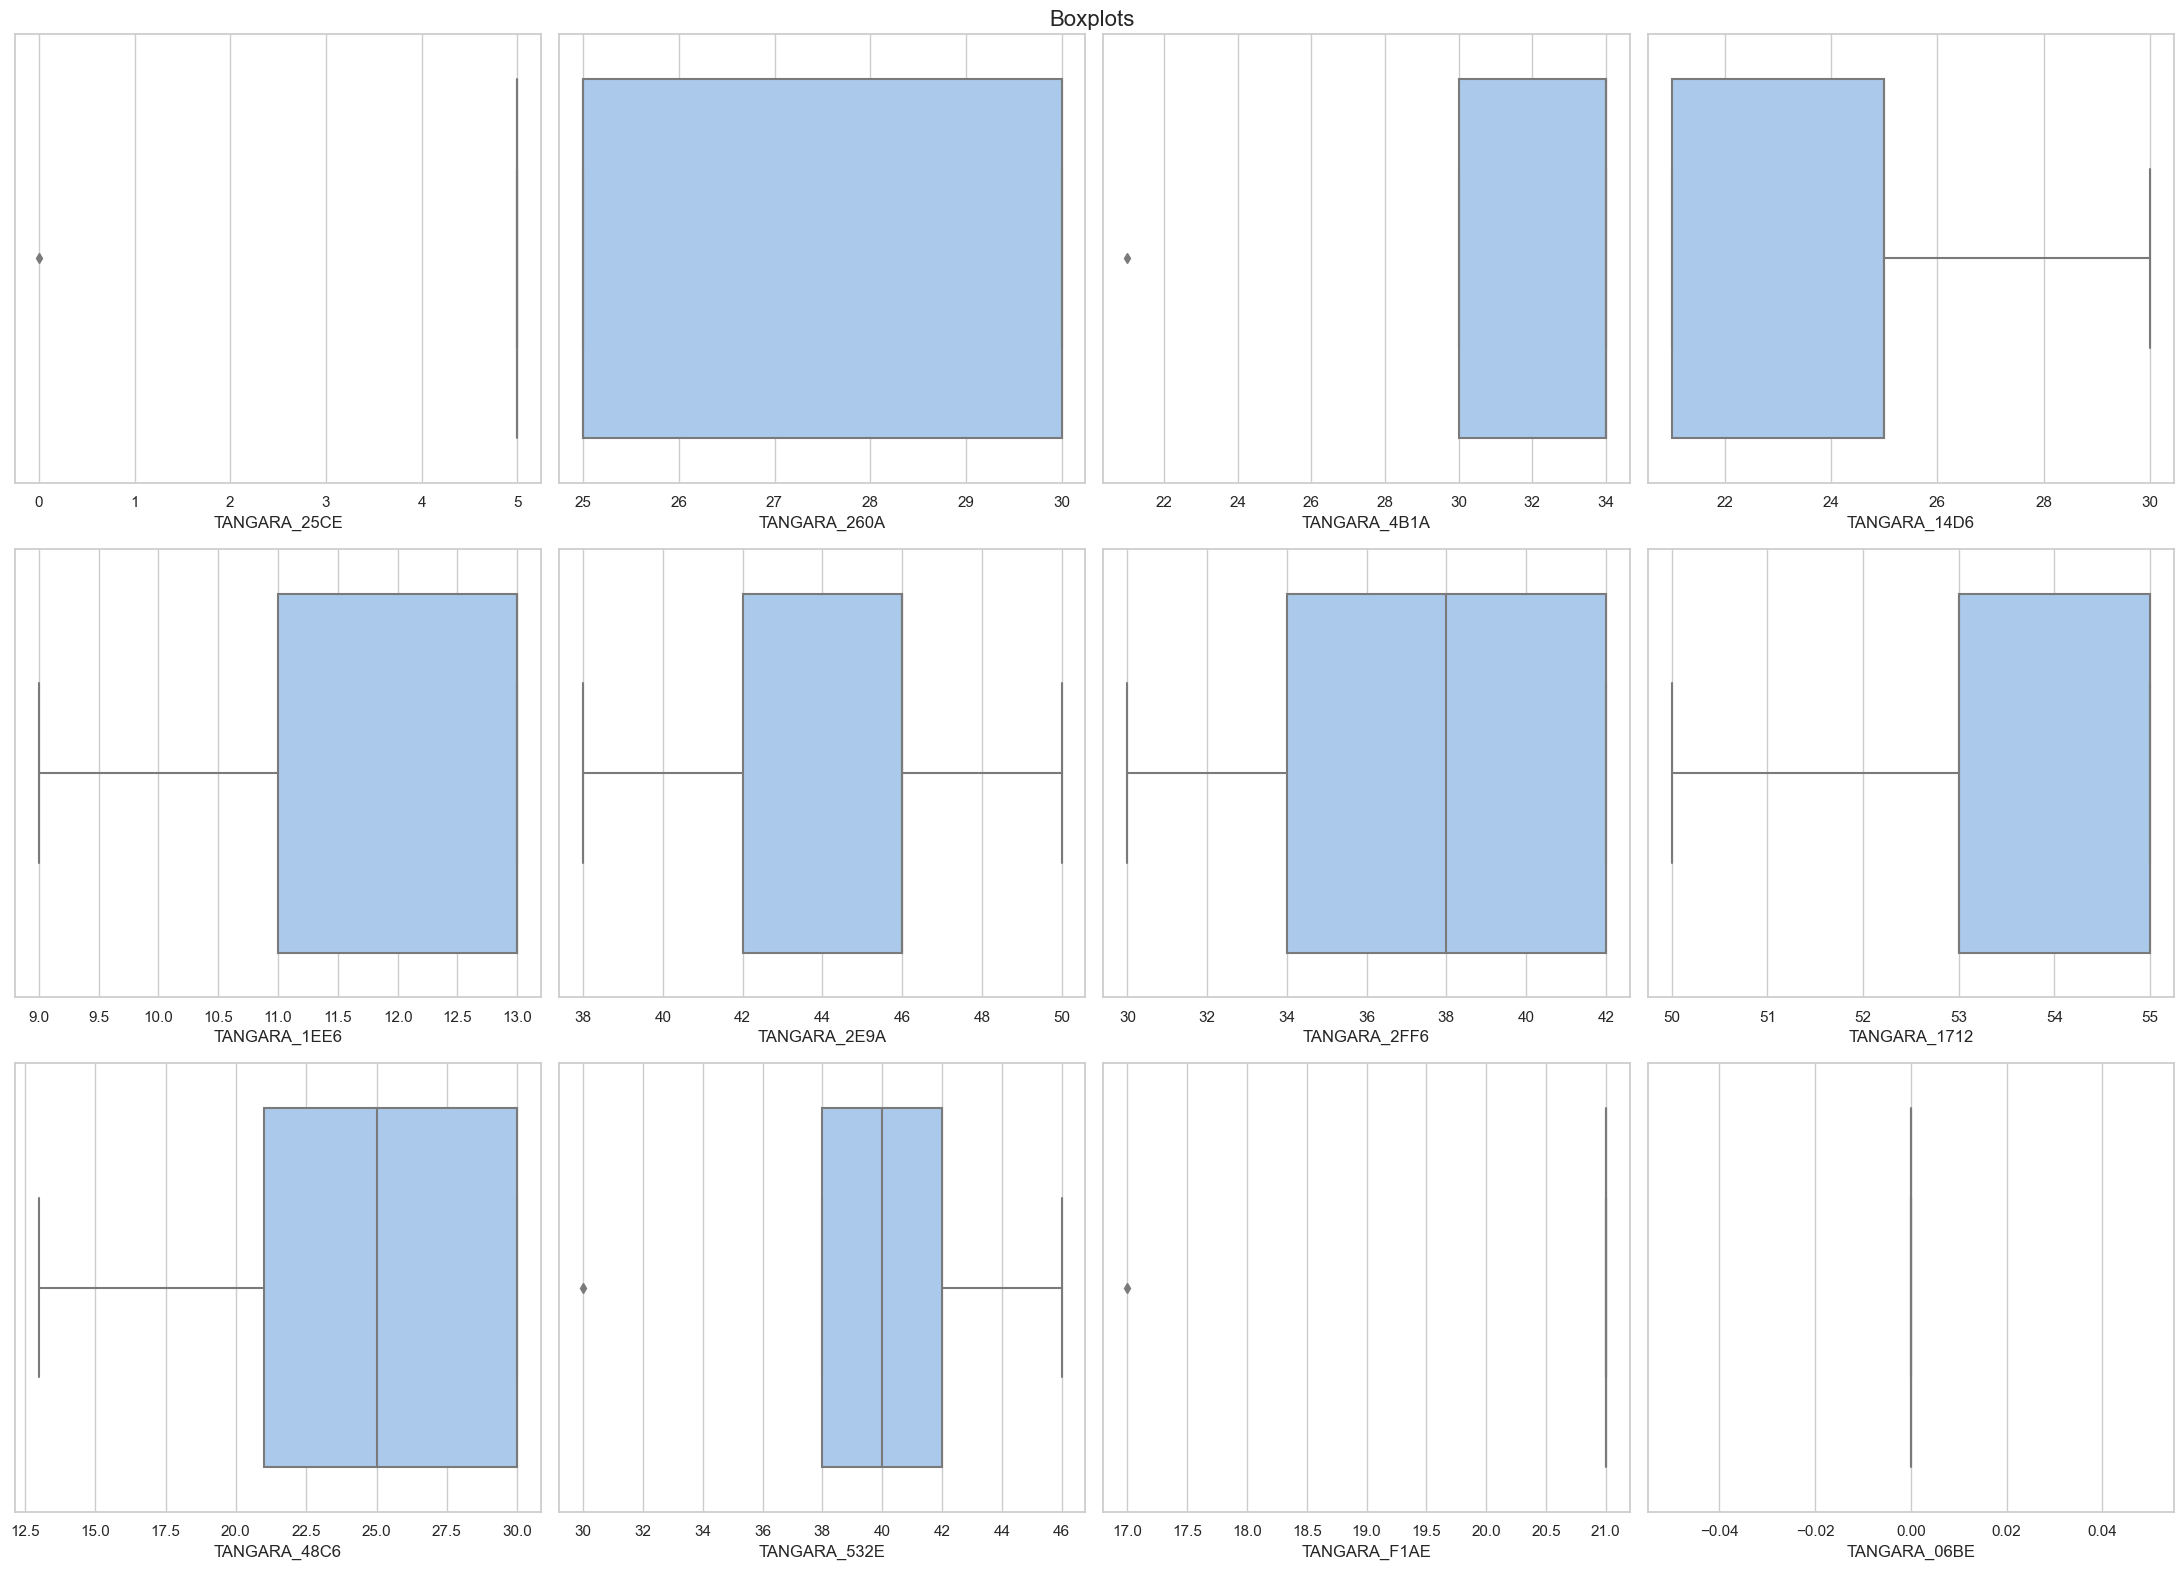

In [7]:
# Plot Boxplots
plot_boxes(df_aqi)

## Lineplots

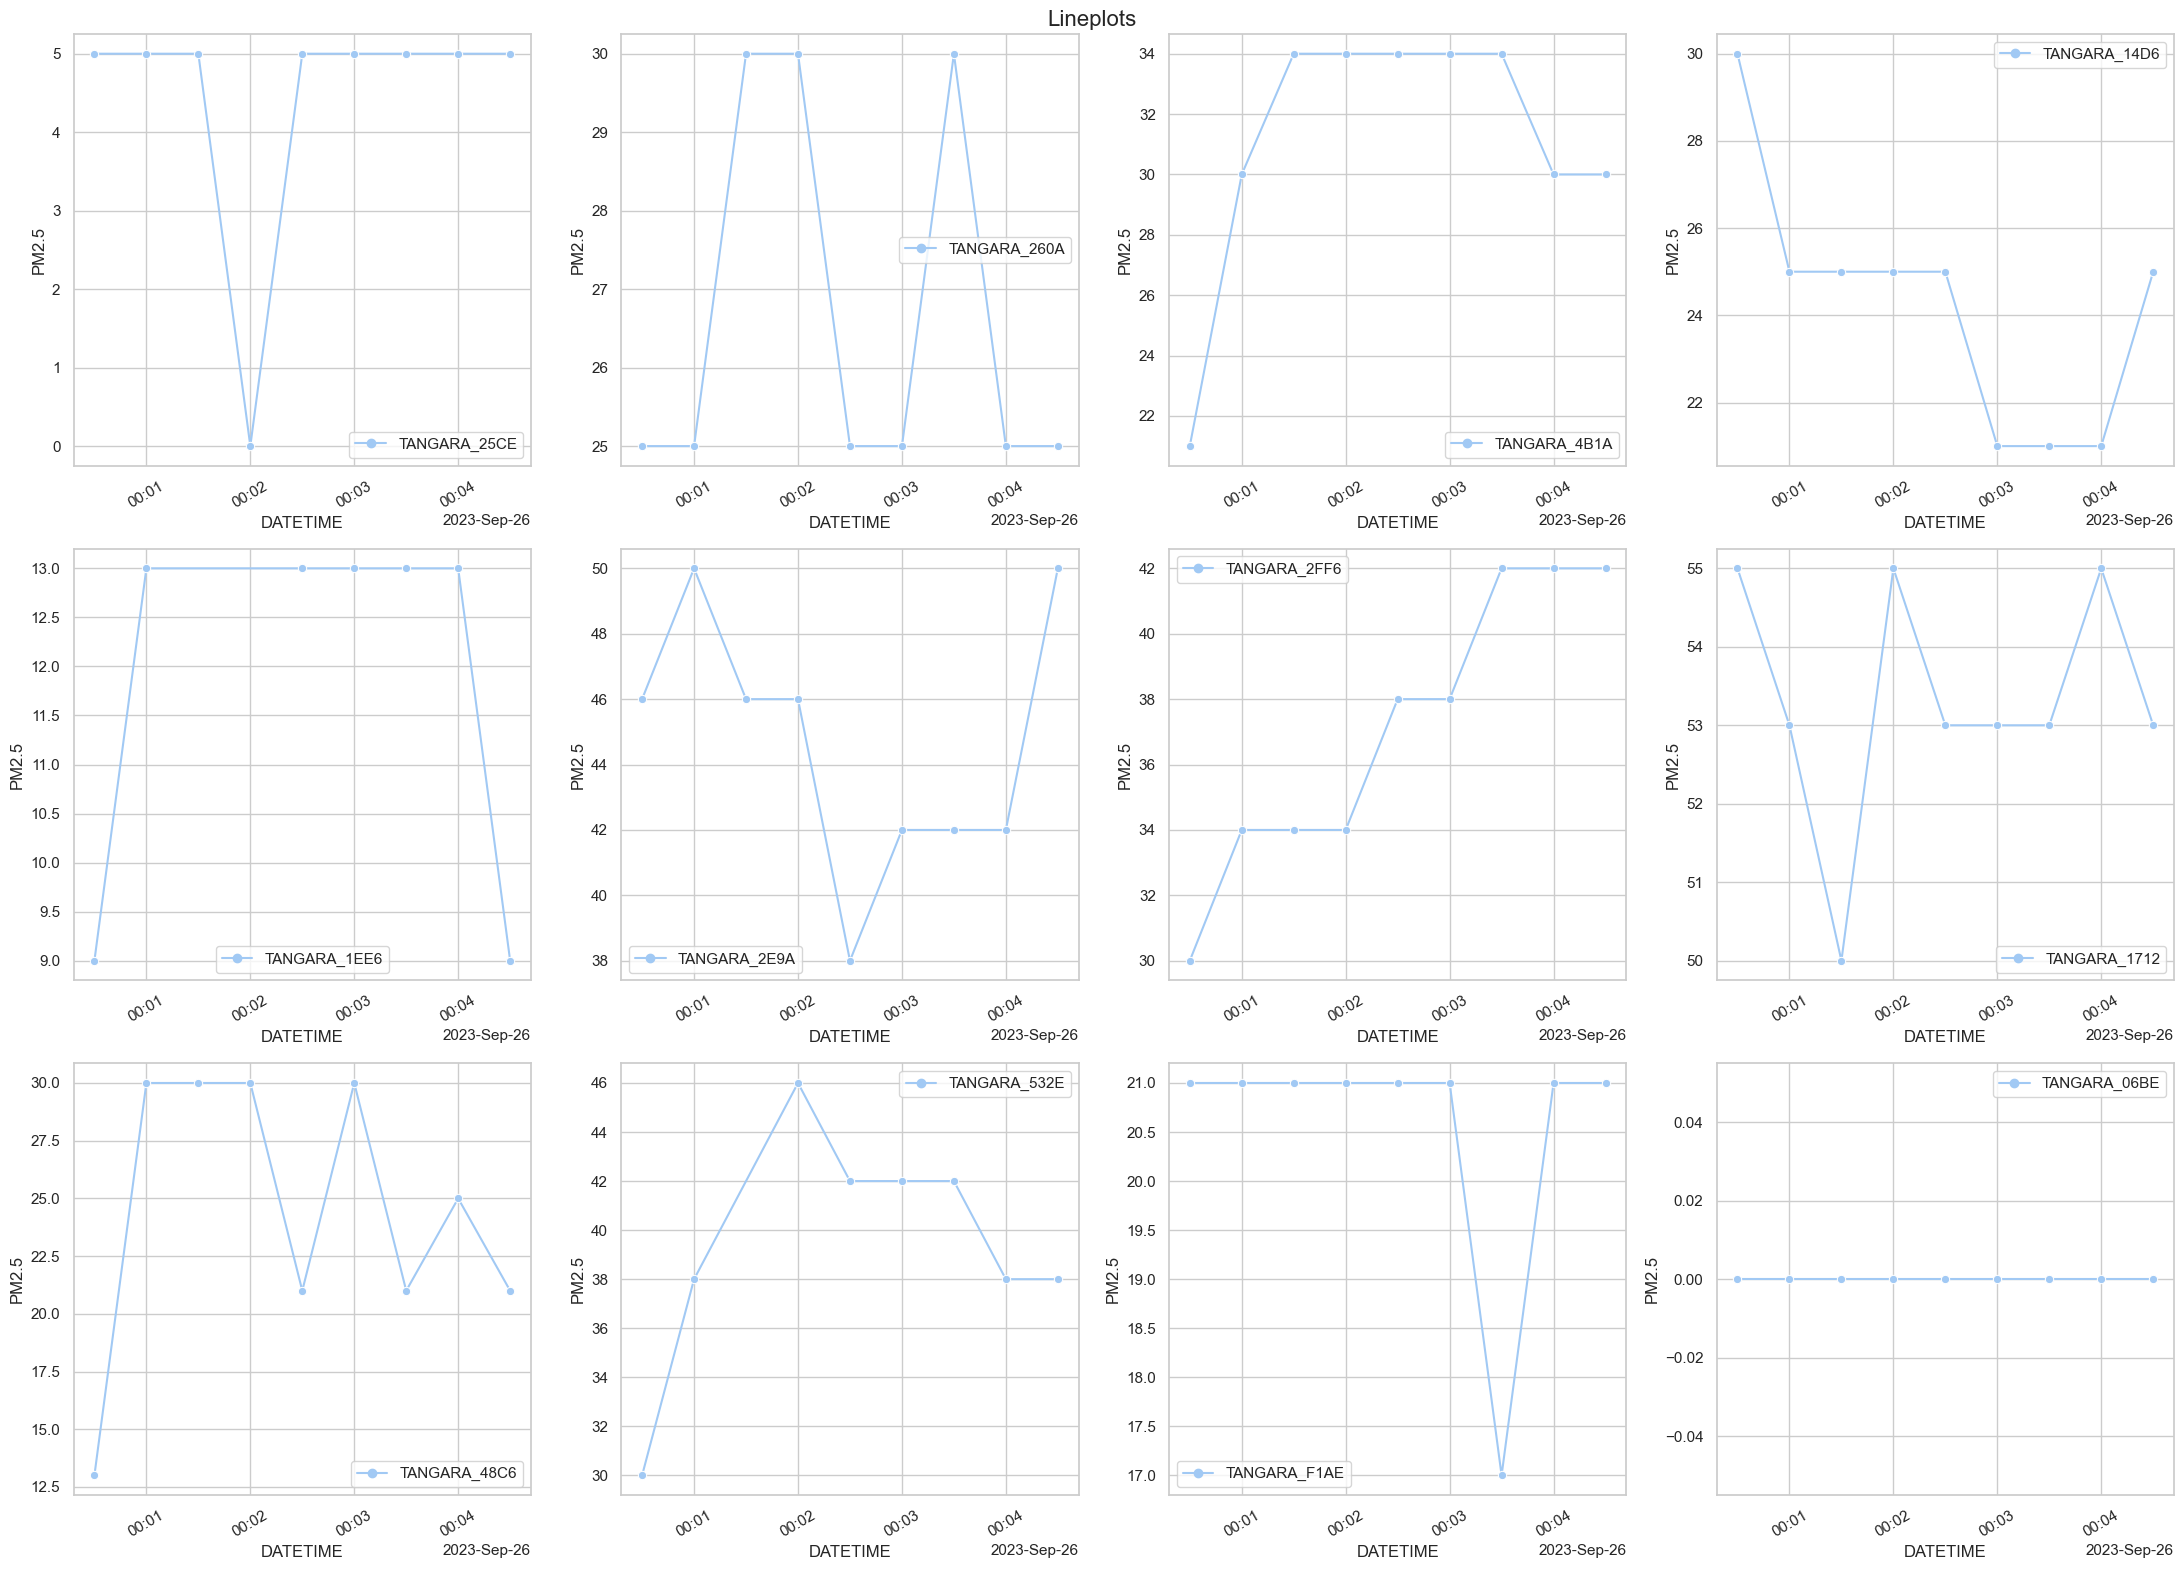

In [8]:
# Plot Lineplots
plot_lines(df_aqi)

In [9]:
# Save AQI Data Frame Sensors into CSV file
df_to_csv(df_aqi, "aqi.csv", datafolder='1_clean')